In [7]:
import sys
sys.path.insert(0, '/home/dom/AIR/air25')

import numpy as np
import pandas as pd

In [8]:
r1 = np.load('eval_results_a1.npy', allow_pickle=True).item()
r2 = np.load('eval_results_a2.npy', allow_pickle=True).item()

In [9]:
summary = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 (macro)', 'F1 (weighted)'],
    'Sparse': [r1['accuracy'], r1['f1_macro'], r1['f1_weighted']],
    'Dense': [r2['accuracy'], r2['f1_macro'], r2['f1_weighted']]
})
summary['Delta'] = summary['Dense'] - summary['Sparse']
print(summary.to_string(index=False))

       Metric   Sparse    Dense    Delta
     Accuracy 0.307971 0.648551 0.340580
   F1 (macro) 0.298882 0.593495 0.294613
F1 (weighted) 0.279868 0.633977 0.354109


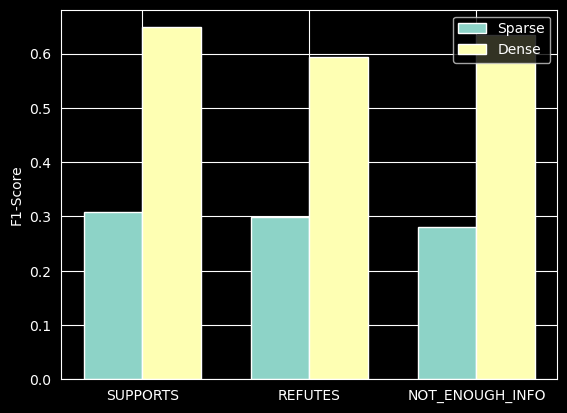

In [28]:
from matplotlib import pyplot as plt

labels = pc['Class']

x = np.arange(3)
w = 0.35

plt.bar(x - w/2, summary['Sparse'], w, label='Sparse')
plt.bar(x + w/2, summary['Dense'], w,label='Dense')

plt.xticks(x, labels)

plt.ylabel('F1-Score')

plt.legend()
plt.show()

In [11]:
LABELS = ['SUPPORTS', 'REFUTES', 'NOT_ENOUGH_INFO']

pc = pd.DataFrame({
    'Class': LABELS,
    'Sparse F1': [r1['per_class']['F1-Score'][i] for i in range(3)],
    'Dense F1': [r2['per_class']['F1-Score'][i] for i in range(3)]
})
print(pc.to_string(index=False))

          Class  Sparse F1  Dense F1
       SUPPORTS   0.214765  0.683333
        REFUTES   0.348548  0.410959
NOT_ENOUGH_INFO   0.333333  0.686192
